In [32]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [33]:
df = pd.read_csv("diabetes.csv") 

datasets = train_test_split(df.values[:, :-1], df.values[:, -1], train_size=0.7, random_state=278823)

train_data, test_data, train_labels, test_labels = datasets

In [34]:
scaler = StandardScaler()

scaler.fit(train_data)

train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [35]:
mlp = MLPClassifier(hidden_layer_sizes=(6, 3), max_iter=500, activation='relu')

mlp.fit(train_data, train_labels)

predictions_train = mlp.predict(train_data)
print(accuracy_score(predictions_train, train_labels))
predictions_test = mlp.predict(test_data)
print(accuracy_score(predictions_test, test_labels))

0.7951582867783985
0.7532467532467533


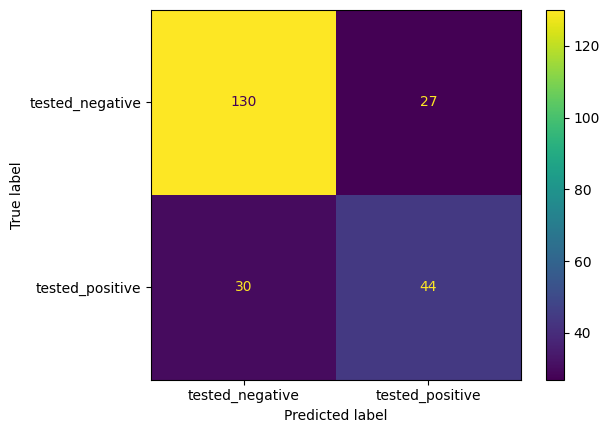

In [36]:
cm = confusion_matrix(test_labels, predictions_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()